## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score  # to evaluate the performance (measure accuracy) of model use r2_score.

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>

In [2]:
# To generate random 
X = random.sample(range(0, 20), 20)
 
print ("Random number list is : " +  str(X))
print(len(X))
print(type(X))

# convert x from list to numpy array
x = np.array(X)
print(type(x))

Random number list is : [7, 10, 0, 17, 4, 16, 8, 15, 3, 18, 2, 14, 5, 13, 9, 11, 19, 12, 6, 1]
20
<class 'list'>
<class 'numpy.ndarray'>


In [3]:
# calculate Y from equation  yi = a*xi + b (and a = -1, b = 2)
y = -1*x + 2
print ("Actual output is : " +  str(y))
print(len(y))
print(type(y))

Actual output is : [ -5  -8   2 -15  -2 -14  -6 -13  -1 -16   0 -12  -3 -11  -7  -9 -17 -10
  -4   1]
20
<class 'numpy.ndarray'>


#### Plot your data points. 

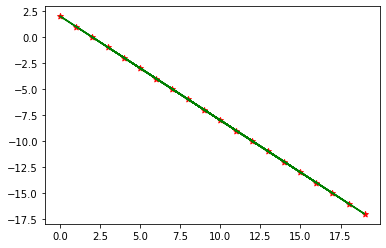

In [4]:
plt.scatter(x,y, marker='*', c='red')
plt.plot(x, y, c='green')
plt.show()

## **Adagrad**

For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [5]:
def GD_Adagrad(x, y , max_iteration, alpha, Epsilon, stop_critia ):

  # modify shape of inuputs
  x = np.column_stack((np.ones(len(x), dtype=int),x)) # create matrix of x by add column x0 (all valeus in this column= 1)
  #print(x.shape)
  y = y.reshape(-1,1)
  #print(y.shape)
  # number of observation
  m = x.shape[0] 
  #  Create theta matrix of size x.shape[1] X 1
  thetas = np.zeros((x.shape[1], 1))
  #print(thetas.shape)
  # lists to return it
  loss_fun = []
  theta0 = []
  theta1= []
  all_y_predict = []

  # initial variable
  count = 0
  vt = 0       #v(t) indicates accumulated gradient up to time t.
  
  for i in range(max_iteration):
    count+=1
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_old = (1/(2*m))*np.sum((y_predict - y)**2)

    # calculate Gradient descent
    Grad = (1/m)*np.transpose(x) @ (y_predict - y)         # x shape (20, 2), y shape (20,1) , so x must be transpose after product y
    # calculate accumulates
    vt = vt + Grad**2   # v(t) accumulates the running sum of square of the gradients. Square of ∇w(t) neglects the sign of gradients.
    # calculate new thetas 
    thetas = thetas - ((alpha)/(np.sqrt(vt) + Epsilon))*Grad
    # Update y_predict && cost function After Gradient
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_new = (1/(2*m))*np.sum((y_predict - y)**2)
    

    # update lists
    loss_fun.append(cost_function_new)
    theta0.append(thetas[0])
    theta1.append(thetas[1])
    all_y_predict.append(y_predict)

    ## cases for stop iterations
    if abs(cost_function_new - cost_function_old) < stop_critia:         #  stop critical cost function (stop when it doesn't decrease with iteration)
       print(f"Convergence occure at {count} iterations")
       print(f"stop critical of Error difference occure at { abs(cost_function_new - cost_function_old)}")
       print(f"Norm of Gradient {np.linalg.norm(Grad,2)}")
       print(f"optimal theta_zero = {theta0[-1]}")
       print(f"optimal theta_one = {theta1[-1]}")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun, y
    
    if (np.linalg.norm(Grad,2))< 0.001:                                     # stop critical Gradient (check if the algorithm reached the minimum )
       print(f'reached to minimum point at {count} iterations')
       print(f"stop critical Gradient occure at Norm of Gradient {np.linalg.norm(Grad,2)}")
       print(f"Error difference { abs(cost_function_new - cost_function_old)}")
       print(f"optimal theta_zero = {theta0[-1]}")
       print(f"optimal theta_one = {theta1[-1]}")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun,y

  
  print(f"We Reach {max_iteration} iterations")
  print(f"Norm of Gradient {np.linalg.norm(Grad,2)}")
  print(f"Error difference{ abs(cost_function_new - cost_function_old)}")
  print(f"optimal theta_zero = {theta0[-1]}")
  print(f"optimal theta_one = {theta1[-1]}")
  return y_predict , all_y_predict , thetas, theta0, theta1, loss_fun, y

#### Try different values of the hyperparameters and see the differnce in your results.

In [6]:
# first attempt
# alpha can work fine for the values 0.0001 and 0.2 
# ε = 1e-8
y_predict_1 , all_y_predict_1 , thetas_1, theta0_1, theta1_1, loss_fun_1, y_actual = GD_Adagrad(x, y , 1000, 0.0001, 1e-8, 0.0001 )
score_1 = r2_score(y_actual, y_predict_1)
print(f"In First Attempt r2_score = {score_1} when alpha = 0.0001 ")

We Reach 1000 iterations
Norm of Gradient 103.94585979309402
Error difference0.00035042317184519334
optimal theta_zero = [-0.0061708]
optimal theta_one = [-0.00617165]
In First Attempt r2_score = -1.650316667540066 when alpha = 0.0001 


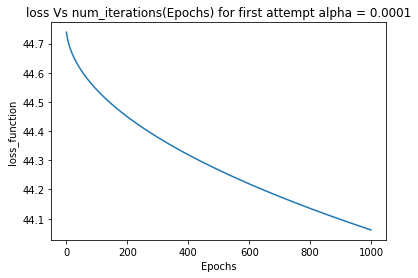

In [7]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_1)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for first attempt alpha = 0.0001')
plt.show()

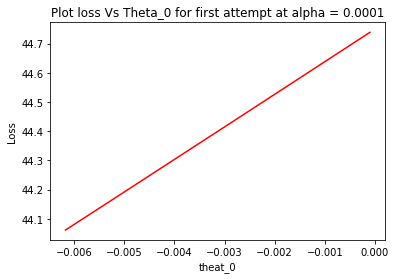

In [8]:
plt.plot(theta0_1, loss_fun_1, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0 for first attempt at alpha = 0.0001")
plt.show()

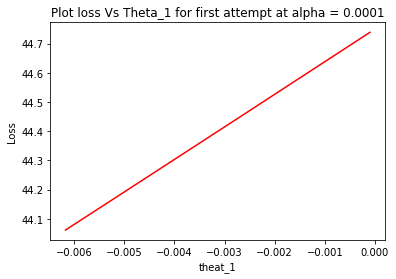

In [9]:
plt.plot(theta1_1, loss_fun_1, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_1 for first attempt at alpha = 0.0001")
plt.show()

In [10]:
# second attempt
y_predict_2 , all_y_predict_2 , thetas_2, theta0_2, theta1_2, loss_fun_2, y_actual = GD_Adagrad(x, y , 1000, 0.001, 1e-8, 0.0001 )
score_2 = r2_score(y_actual, y_predict_2)
print(f"In Second Attempt r2_score = {score_2} when alpha = 0.001 ")

We Reach 1000 iterations
Norm of Gradient 96.64421831686532
Error difference0.003173719075014958
optimal theta_zero = [-0.06084618]
optimal theta_one = [-0.06093642]
In Second Attempt r2_score = -1.2972731186312427 when alpha = 0.001 


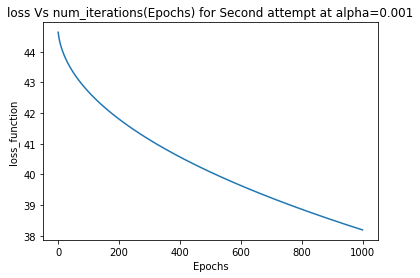

In [11]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_2)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for Second attempt at alpha=0.001')
plt.show()

In [12]:
# third attempt
y_predict_3 , all_y_predict_3 , thetas_3, theta0_3, theta1_3, loss_fun_3, y_actual = GD_Adagrad(x, y , 1000, 0.01, 1e-8, 0.0001 )
score_3 = r2_score(y_actual, y_predict_3)
print(f"In Third Attempt r2_score = {score_3} when alpha = 0.01 ")

We Reach 1000 iterations
Norm of Gradient 36.83550921769721
Error difference0.007574830337333971
optimal theta_zero = [-0.49335615]
optimal theta_one = [-0.51066134]
In Third Attempt r2_score = 0.6208309462350136 when alpha = 0.01 


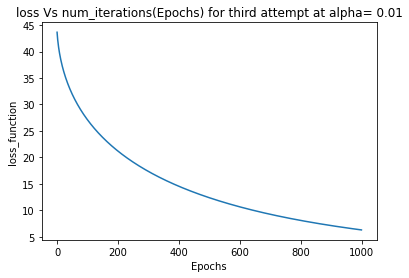

In [13]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_3)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for third attempt at alpha= 0.01')
plt.show()

In [14]:
# fourth attempt
y_predict_4 , all_y_predict_4 , thetas_4, theta0_4, theta1_4, loss_fun_4, y_actual = GD_Adagrad(x, y , 1000, 0.1, 1e-8, 0.0001 )
score_4 = r2_score(y_actual, y_predict_4)
print(f"In Fourth Attempt r2_score = {score_4} when alpha = 0.1 ")

We Reach 1000 iterations
Norm of Gradient 0.2968736020591688
Error difference0.0002179936750960343
optimal theta_zero = [1.16565087]
optimal theta_one = [-0.93411134]
In Fourth Attempt r2_score = 0.9943524163129175 when alpha = 0.1 


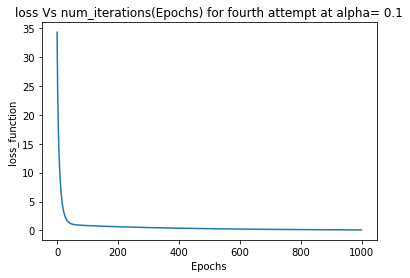

In [15]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_4)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for fourth attempt at alpha= 0.1')
plt.show()

In [16]:
# fifth attempt
y_predict_5 , all_y_predict_5 , thetas_5, theta0_5, theta1_5, loss_fun_5, y_actual = GD_Adagrad(x, y , 1000, 0.05, 1e-8, 0.0001 )
score_5 = r2_score(y_actual, y_predict_5)
print(f"In FiFth Attempt r2_score = {score_5} when alpha = 0.05 ") # alpha between 0.1 and 0.01

We Reach 1000 iterations
Norm of Gradient 0.7301969783123148
Error difference0.00037331254080230636
optimal theta_zero = [0.04290316]
optimal theta_one = [-0.84503708]
In FiFth Attempt r2_score = 0.9689135421014029 when alpha = 0.05 


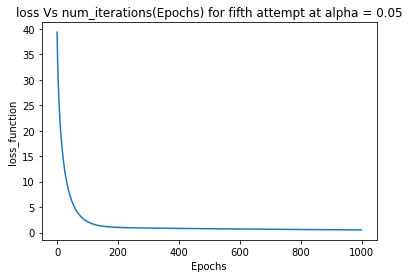

In [17]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_5)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for fifth attempt at alpha = 0.05')
plt.show()

In [18]:
# sixth attempt
y_predict_6 , all_y_predict_6 , thetas_6, theta0_6, theta1_6, loss_fun_6, y_actual = GD_Adagrad(x, y , 1000, 0.2, 1e-8, 0.0001 )
score_6 = r2_score(y_actual, y_predict_6)
print(f"In Sixth Attempt r2_score = {score_6} when alpha = 0.2 ") 

Convergence occure at 572 iterations
stop critical of Error difference occure at 9.939534987968637e-05
Norm of Gradient 0.11182016524353694
optimal theta_zero = [1.68607827]
optimal theta_one = [-0.97521157]
In Sixth Attempt r2_score = 0.9992005255311294 when alpha = 0.2 


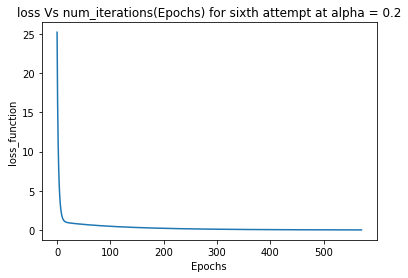

In [19]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_6)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for sixth attempt at alpha = 0.2')
plt.show()

#### Plot all regression lines till converge for learning rate = 0.1

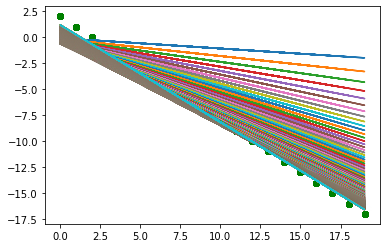

In [20]:
for py in all_y_predict_4:
    plt.scatter(X,y_actual, color = 'green')
    plt.plot(X, py)
plt.show()

### Plot The Best Regression Line for learning rate = 0.1

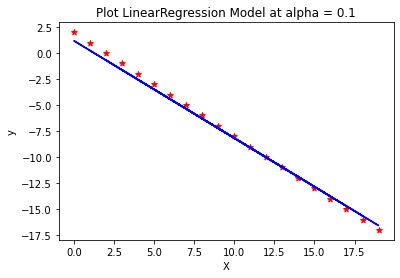

In [21]:
plt.scatter(X,y_actual, marker = '*',color = 'red')
plt.plot(X,y_predict_4 , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model at alpha = 0.1")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss at alpha = 0.1

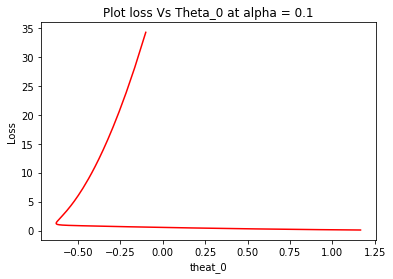

In [22]:
plt.plot(theta0_4, loss_fun_4, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0 at alpha = 0.1")
plt.show()

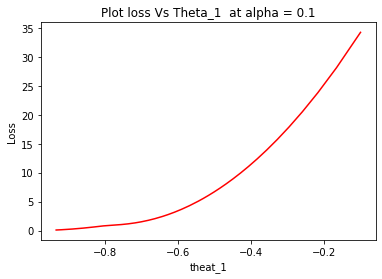

In [23]:
plt.plot(theta1_4, loss_fun_4, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_1  at alpha = 0.1")
plt.show()

## **RMSProp**

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [24]:
def GD_RMSProp(x, y , max_iteration, alpha, Beta, Epsilon, stop_critia ):

  # modify shape of inuputs
  x = np.column_stack((np.ones(len(x), dtype=int),x)) # create matrix of x by add column x0 (all valeus in this column= 1)
  #print(x.shape)
  y = y.reshape(-1,1)
  #print(y.shape)
  # number of observation
  m = x.shape[0] 
  #  Create theta matrix of size x.shape[1] X 1
  thetas = np.zeros((x.shape[1], 1))
  #print(thetas.shape)
  # lists to return it
  loss_fun = []
  theta0 = []
  theta1= []
  all_y_predict = []

  # initial variable
  count = 0
  vt = 0       # Prevents rapid growth of v(t).
  
  for i in range(max_iteration):
    count+=1
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_old = (1/(2*m))*np.sum((y_predict - y)**2)

    # calculate Gradient descent
    Grad = (1/m)*np.transpose(x) @ (y_predict - y)         # x shape (20, 2), y shape (20,1) , so x must be transpose after product y
    # calculate exponentially decaying average
    vt = (Beta*vt) +((1-Beta) *(Grad**2) )  #  v(t) is exponentially decaying average of all the previous squared gradients
    # calculate new thetas 
    thetas = thetas - ((alpha)/(np.sqrt(vt) + Epsilon))*Grad
    # Update y_predict && cost function After Gradient
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_new = (1/(2*m))*np.sum((y_predict - y)**2)
    

    # update lists
    loss_fun.append(cost_function_new)
    theta0.append(thetas[0])
    theta1.append(thetas[1])
    all_y_predict.append(y_predict)

    ## cases for stop iterations
    if abs(cost_function_new - cost_function_old) < stop_critia:         #  stop critical cost function (stop when it doesn't decrease with iteration)
       print(f"Convergence occure at {count} iterations")
       print(f"stop critical of Error difference occure at { abs(cost_function_new - cost_function_old)}")
       print(f"Norm of Gradient {np.linalg.norm(Grad,2)}")
       print(f"optimal theta_zero = {theta0[-1]}")
       print(f"optimal theta_one = {theta1[-1]}")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun, y
    
    if (np.linalg.norm(Grad,2))< 0.001:                                     # stop critical Gradient (check if the algorithm reached the minimum )
       print(f'reached to minimum point at {count} iterations')
       print(f"stop critical Gradient occure at Norm of Gradient {np.linalg.norm(Grad,2)}")
       print(f"Error difference { abs(cost_function_new - cost_function_old)}")
       print(f"optimal theta_zero = {theta0[-1]}")
       print(f"optimal theta_one = {theta1[-1]}")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun,y

  
  print(f"We Reach {max_iteration} iterations")
  print(f"Norm of Gradient {np.linalg.norm(Grad,2)}")
  print(f"Error difference{ abs(cost_function_new - cost_function_old)}")
  print(f"optimal theta_zero = {theta0[-1]}")
  print(f"optimal theta_one = {theta1[-1]}")
  return y_predict , all_y_predict , thetas, theta0, theta1, loss_fun, y

### Try different values of the hyperparameters and see the differnce in your results.

In [25]:
# first attempt
# alpha can work fine for the values 0.0001 and 0.2 
# ε = 1e-8
# β2 = 0.999
y_predict_1 , all_y_predict_1 , thetas_1, theta0_1, theta1_1, loss_fun_1, y_actual = GD_RMSProp(x, y , 1000, 0.0001, 0.999,1e-8, 0.0001 )
score_1 = r2_score(y_actual, y_predict_1)
print(f"In First Attempt r2_score = {score_1} when alpha = 0.0001 and Beta = 0.999")

We Reach 1000 iterations
Norm of Gradient 77.81006754202457
Error difference0.009461366747370192
optimal theta_zero = [-0.20108685]
optimal theta_one = [-0.20227434]
In First Attempt r2_score = -0.5060032067241285 when alpha = 0.0001 and Beta = 0.999


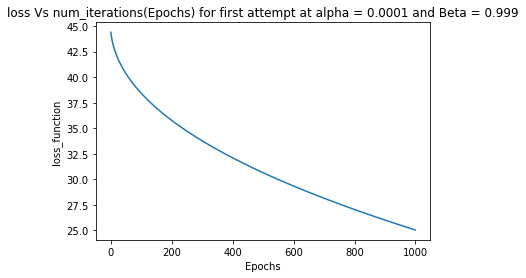

In [26]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_1)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for first attempt at alpha = 0.0001 and Beta = 0.999')
plt.show()

In [27]:
# second attempt
# ε = 1e-8
# β2 = 0.99
y_predict_2 , all_y_predict_2 , thetas_2, theta0_2, theta1_2, loss_fun_2, y_actual = GD_RMSProp(x, y , 1000, 0.001, 0.99,1e-8, 0.0001 )
score_2 = r2_score(y_actual, y_predict_2)
print(f"In second Attempt r2_score = {score_2} when alpha = 0.001 and Beta = 0.99") 
## we notes that when use RMsProp algorithm at alpha = 0.001 the r2_score = 0.94 , it's the best result than use Adagrad algorithm at alpha= 0.001 the r2_score = -1.297273
## the reason for that , In Adagrad algorithm , the learning rate decay very aggressively as the denominator grows (not good for parameter corresponding to dense feature) 
##hence there is no update in value of parameter so learning rate gets killed because denominator growing very fast. it reaches to near the minima point but not at the minima

We Reach 1000 iterations
Norm of Gradient 1.5431349037465014
Error difference0.0008863370418898953
optimal theta_zero = [-0.50885173]
optimal theta_one = [-0.79550186]
In second Attempt r2_score = 0.948541678467904 when alpha = 0.001 and Beta = 0.99


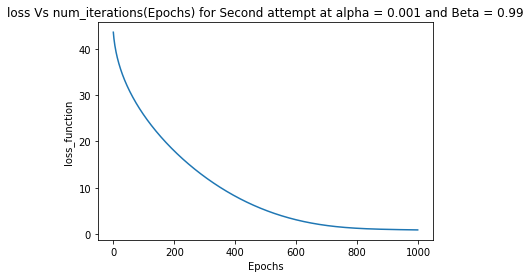

In [28]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_2)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for Second attempt at alpha = 0.001 and Beta = 0.99')
plt.show()

In [29]:
#third attempt
# ε = 1e-8
# β2 = 0.99
y_predict_3 , all_y_predict_3 , thetas_3, theta0_3, theta1_3, loss_fun_3, y_actual = GD_RMSProp(x, y , 1000, 0.01, 0.99,1e-8, 0.0001 )
score_3 = r2_score(y_actual, y_predict_3)
print(f"In third Attempt r2_score = {score_3} when alpha = 0.01 and Beta = 0.99")

Convergence occure at 565 iterations
stop critical of Error difference occure at 9.824429599661821e-05
Norm of Gradient 0.05161434004771836
optimal theta_zero = [1.83430291]
optimal theta_one = [-0.98702601]
In third Attempt r2_score = 0.99977749486194 when alpha = 0.01 and Beta = 0.99


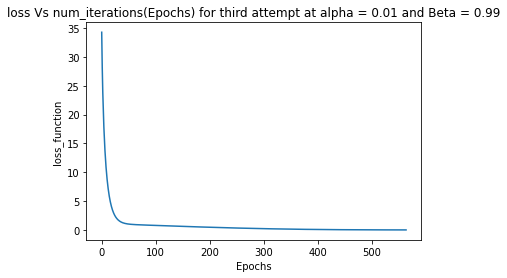

In [30]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_3)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for third attempt at alpha = 0.01 and Beta = 0.99')
plt.show()

In [31]:
#fourth attempt
# ε = 1e-8
# β2 = 0.99
y_predict_4 , all_y_predict_4 , thetas_4, theta0_4, theta1_4, loss_fun_4, y_actual = GD_RMSProp(x, y , 1000, 0.1, 0.99,1e-8, 0.0001 )
score_4 = r2_score(y_actual, y_predict_4)
print(f"In Fourth Attempt r2_score = {score_4} when alpha = 0.1 and Beta = 0.99")

Convergence occure at 92 iterations
stop critical of Error difference occure at 9.875940676194327e-05
Norm of Gradient 0.0318996534638792
optimal theta_zero = [1.91400883]
optimal theta_one = [-0.9932109]
In Fourth Attempt r2_score = 0.999940012695897 when alpha = 0.1 and Beta = 0.99


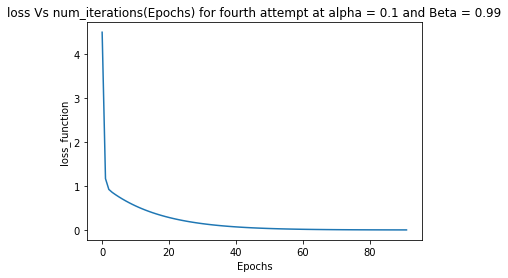

In [32]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_4)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for fourth attempt at alpha = 0.1 and Beta = 0.99')
plt.show()

#### Plot all regression lines till converge for learning rate = 0.1 and beta = 0.99

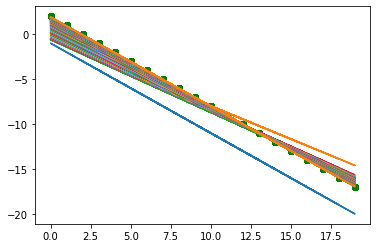

In [33]:
for py in all_y_predict_4:
    plt.scatter(X,y_actual, color = 'green')
    plt.plot(X, py)
plt.show()

### Plot The Best Regression Line for learning rate = 0.1 and beta = 0.99

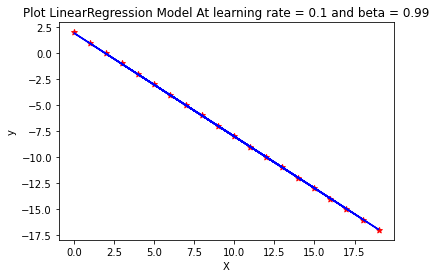

In [34]:
plt.scatter(X,y_actual, marker = '*',color = 'red')
plt.plot(X,y_predict_4 , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model At learning rate = 0.1 and beta = 0.99")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

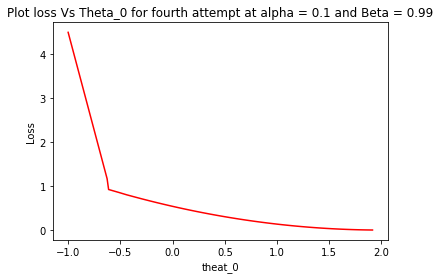

In [35]:
plt.plot(theta0_4, loss_fun_4, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0 for fourth attempt at alpha = 0.1 and Beta = 0.99")
plt.show()

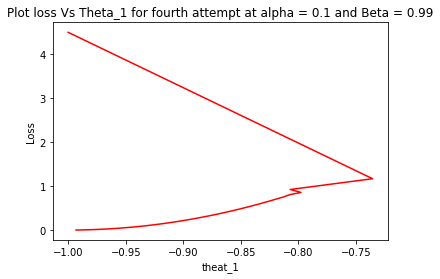

In [36]:
plt.plot(theta1_4, loss_fun_4, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_1 for fourth attempt at alpha = 0.1 and Beta = 0.99")
plt.show()

## **Adam**

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [37]:
## Adam deals with adaptive learning rate and adaptive momentum .
def GD_Adam(x, y , max_iteration, alpha, Beta_2, Beta_1, Epsilon, stop_critia ):

  # modify shape of inuputs
  x = np.column_stack((np.ones(len(x), dtype=int),x)) # create matrix of x by add column x0 (all valeus in this column= 1)
  #print(x.shape)
  y = y.reshape(-1,1)
  #print(y.shape)
  # number of observation
  m = x.shape[0] 
  #  Create theta matrix of size x.shape[1] X 1
  thetas = np.zeros((x.shape[1], 1))
  #print(thetas.shape)
  # lists to return it
  loss_fun = []
  theta0 = []
  theta1= []
  all_y_predict = []

  # initial variable
  count = 0
  vt = 0       # Prevents rapid growth of v(t).
  mt = 0       # Adaptive Moment Estimation (Adam) computes the exponentially decaying average of previous gradients m(t) along with an adaptive learning rate.
  
  for i in range(max_iteration):
    count+=1
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_old = (1/(2*m))*np.sum((y_predict - y)**2)

    # calculate Gradient descent
    Grad = (1/m)*np.transpose(x) @ (y_predict - y)         # x shape (20, 2), y shape (20,1) , so x must be transpose after product y
    # calculate exponentially decaying average
    vt = (Beta_2*vt) +((1-Beta_2) *(Grad**2) )  #  v(t) is exponentially decaying average of all the previous squared gradients
    mt = (Beta_1 *mt) + ((1-Beta_1)* Grad)     #  m(t) moment Estimation (Adam) computes the exponentially decaying
    # Bias Correction
    # ## because the initial values of 𝒗_𝒕 will be very low which need to be compensated
    vt = vt/(1-(Beta_2**(i+1)))     # poewr must be (i+1) not i (in the first iteration i=0 , division by 0 )
    mt = mt/(1 - (Beta_1**(i+1)))
    # calculate new thetas 
    thetas = thetas - ((alpha)/(np.sqrt(vt) + Epsilon))*mt
    # Update y_predict && cost function After Gradient
    # calculate Hypothesis function
    y_predict = x @ thetas
    # calculate cost function
    cost_function_new = (1/(2*m))*np.sum((y_predict - y)**2)
    

    # update lists
    loss_fun.append(cost_function_new)
    theta0.append(thetas[0])
    theta1.append(thetas[1])
    all_y_predict.append(y_predict)

    ## cases for stop iterations
    if abs(cost_function_new - cost_function_old) < stop_critia:         #  stop critical cost function (stop when it doesn't decrease with iteration)
       print(f"Convergence occure at {count} iterations")
       print(f"stop critical of Error difference occure at { abs(cost_function_new - cost_function_old)}")
       print(f"Norm of Gradient {np.linalg.norm(Grad,2)}")
       print(f"optimal theta_zero = {theta0[-1]}")
       print(f"optimal theta_one = {theta1[-1]}")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun, y
    
    if (np.linalg.norm(Grad,2))< 0.001:                                     # stop critical Gradient (check if the algorithm reached the minimum )
       print(f'reached to minimum point at {count} iterations')
       print(f"stop critical Gradient occure at Norm of Gradient {np.linalg.norm(Grad,2)}")
       print(f"Error difference { abs(cost_function_new - cost_function_old)}")
       print(f"optimal theta_zero = {theta0[-1]}")
       print(f"optimal theta_one = {theta1[-1]}")
       return  y_predict , all_y_predict , thetas, theta0, theta1, loss_fun,y

  
  print(f"We Reach {max_iteration} iterations")
  print(f"Norm of Gradient {np.linalg.norm(Grad,2)}")
  print(f"Error difference{ abs(cost_function_new - cost_function_old)}")
  print(f"optimal theta_zero = {theta0[-1]}")
  print(f"optimal theta_one = {theta1[-1]}")
  return y_predict , all_y_predict , thetas, theta0, theta1, loss_fun, y

#### Try different values of the hyperparameters and see the differnce in your results.

In [38]:
# first attempt
# alpha can work fine for the values 0.0001 and 0.1 
# ε = 1e-8
# β2 = 0.999  for(vt)
# β1 = 0.9 for(mt)
y_predict_1 , all_y_predict_1 , thetas_1, theta0_1, theta1_1, loss_fun_1, y_actual = GD_Adam(x, y , 1000, 0.0001, 0.999, 0.9,1e-8, 0.0001 )
score_1 = r2_score(y_actual, y_predict_1)
print(f"In First Attempt r2_score = {score_1} when alpha = 0.0001 , Beta_2 = 0.999 and Beta_1= 0.9")

Convergence occure at 4 iterations
stop critical of Error difference occure at 8.149403301160874e-05
Norm of Gradient 104.75172959068438
optimal theta_zero = [-0.00012863]
optimal theta_one = [-0.00012863]
In First Attempt r2_score = -1.6908628358360263 when alpha = 0.0001 , Beta_2 = 0.999 and Beta_1= 0.9


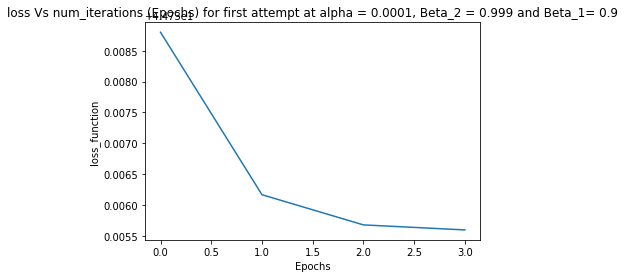

In [39]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_1)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations (Epochs) for first attempt at alpha = 0.0001, Beta_2 = 0.999 and Beta_1= 0.9')
plt.show()

In [40]:
# Second attempt
y_predict_2 , all_y_predict_2 , thetas_2, theta0_2, theta1_2, loss_fun_2, y_actual = GD_Adam(x, y , 1000, 0.001, 0.999, 0.9,1e-8, 0.0001 )
score_2 = r2_score(y_actual, y_predict_2)
print(f"In second Attempt r2_score = {score_2} when alpha = 0.001 , Beta_2 = 0.999 and Beta_1= 0.9")

Convergence occure at 6 iterations
stop critical of Error difference occure at 1.8852919346556973e-05
Norm of Gradient 104.5970408699677
optimal theta_zero = [-0.00128756]
optimal theta_one = [-0.00128757]
In second Attempt r2_score = -1.6830623513030694 when alpha = 0.001 , Beta_2 = 0.999 and Beta_1= 0.9


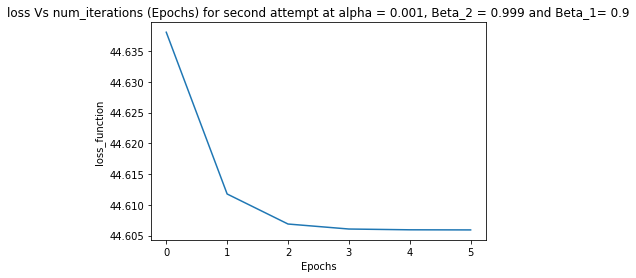

In [41]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_2)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations (Epochs) for second attempt at alpha = 0.001, Beta_2 = 0.999 and Beta_1= 0.9')
plt.show()

In [42]:
# Third attempt
y_predict_3 , all_y_predict_3 , thetas_3, theta0_3, theta1_3, loss_fun_3, y_actual = GD_Adam(x, y , 1000, 0.01, 0.99, 0.8,1e-8, 0.0001 )
score_3 = r2_score(y_actual, y_predict_3)
print(f"In third Attempt r2_score = {score_3} when alpha = 0.01 , Beta_2 = 0.99 and Beta_1= 0.8")

Convergence occure at 9 iterations
stop critical of Error difference occure at 5.850233041115871e-05
Norm of Gradient 102.6891657098425
optimal theta_zero = [-0.01558724]
optimal theta_one = [-0.01558885]
In third Attempt r2_score = -1.587759218132486 when alpha = 0.01 , Beta_2 = 0.99 and Beta_1= 0.8


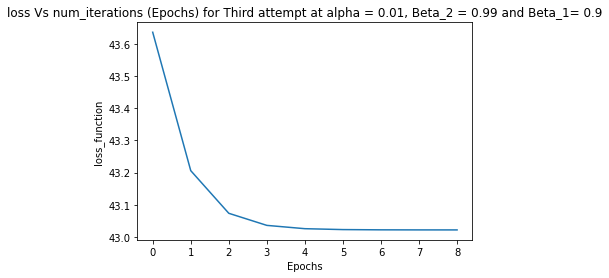

In [43]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_3)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations (Epochs) for Third attempt at alpha = 0.01, Beta_2 = 0.99 and Beta_1= 0.9')
plt.show()

In [44]:
# fourth attempt
y_predict_4 , all_y_predict_4 , thetas_4, theta0_4, theta1_4, loss_fun_4, y_actual = GD_Adam(x, y , 1000, 0.1, 0.99, 0.8,1e-8, 0.0001 )
score_4 = r2_score(y_actual, y_predict_4)
print(f"In fourth Attempt r2_score = {score_4} when alpha = 0.1 , Beta_2 = 0.99 and Beta_1= 0.8")

Convergence occure at 11 iterations
stop critical of Error difference occure at 3.748076366605346e-05
Norm of Gradient 84.16697530525805
optimal theta_zero = [-0.15427521]
optimal theta_one = [-0.15443732]
In fourth Attempt r2_score = -0.7543022144053777 when alpha = 0.1 , Beta_2 = 0.99 and Beta_1= 0.8


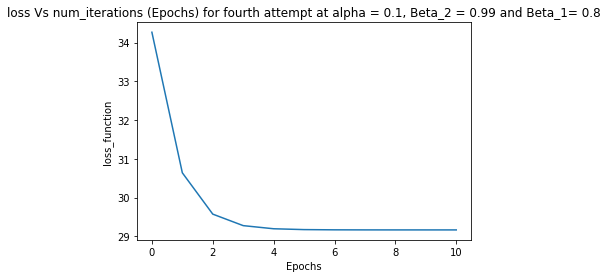

In [45]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_4)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations (Epochs) for fourth attempt at alpha = 0.1, Beta_2 = 0.99 and Beta_1= 0.8')
plt.show()

In [46]:
## fifth attempt
y_predict_5 , all_y_predict_5 , thetas_5, theta0_5, theta1_5, loss_fun_5, y_actual = GD_Adam(x, y , 1000, 0.1, 0.9, 0.8,1e-8, 0.0001 )
score_5 = r2_score(y_actual, y_predict_5)
print(f"In Fifth Attempt r2_score = {score_5} when alpha = 0.1 , Beta_2 = 0.9 and Beta_1= 0.8")

Convergence occure at 32 iterations
stop critical of Error difference occure at 6.558972616854675e-05
Norm of Gradient 1.0069476290408141
optimal theta_zero = [-0.78224114]
optimal theta_one = [-0.79113007]
In Fifth Attempt r2_score = 0.9372224656349661 when alpha = 0.1 , Beta_2 = 0.9 and Beta_1= 0.8


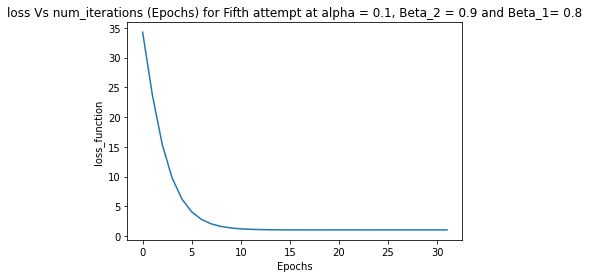

In [47]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_5)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations (Epochs) for Fifth attempt at alpha = 0.1, Beta_2 = 0.9 and Beta_1= 0.8')
plt.show()

In [48]:
## sixth attempt
y_predict_6 , all_y_predict_6 , thetas_6, theta0_6, theta1_6, loss_fun_6, y_actual = GD_Adam(x, y , 1000, 0.1, 0.8, 0.7,1e-8, 0.0001 )
score_6 = r2_score(y_actual, y_predict_6)
print(f"In sixth Attempt r2_score = {score_6} when alpha = 0.1 , Beta_2 = 0.8 and Beta_1= 0.7")

Convergence occure at 66 iterations
stop critical of Error difference occure at 6.405733827255511e-05
Norm of Gradient 0.29789771387651726
optimal theta_zero = [1.81426424]
optimal theta_one = [-0.99366204]
In sixth Attempt r2_score = 0.9994859486486741 when alpha = 0.1 , Beta_2 = 0.8 and Beta_1= 0.7


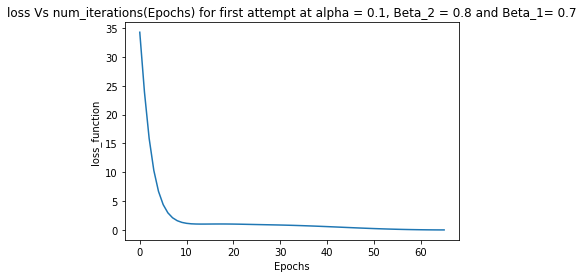

In [49]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_6)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for first attempt at alpha = 0.1, Beta_2 = 0.8 and Beta_1= 0.7')
plt.show()

#### Plot all regression lines till converge for learning rate = 0.1, Beta_2 = 0.8 and Beta_1= 0.7

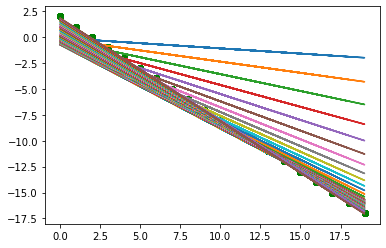

In [50]:
for py in all_y_predict_6:
    plt.scatter(X,y_actual, color = 'green')
    plt.plot(X, py)
plt.show()

### Plot The Best Regression Line for learning rate = 0.1, Beta_2 = 0.8 and Beta_1= 0.7

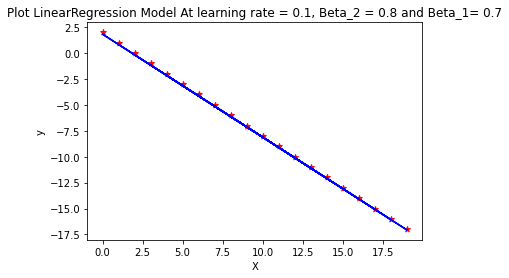

In [51]:
plt.scatter(X,y_actual, marker = '*',color = 'red')
plt.plot(X,y_predict_6 , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model At learning rate = 0.1, Beta_2 = 0.8 and Beta_1= 0.7")
plt.show()

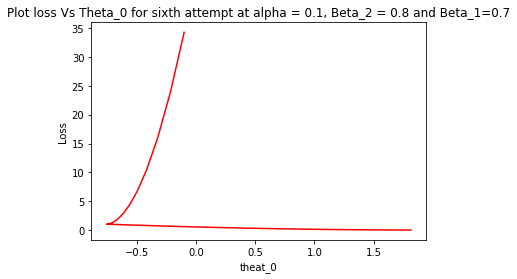

In [52]:
plt.plot(theta0_6, loss_fun_6, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0 for sixth attempt at alpha = 0.1, Beta_2 = 0.8 and Beta_1=0.7")
plt.show()

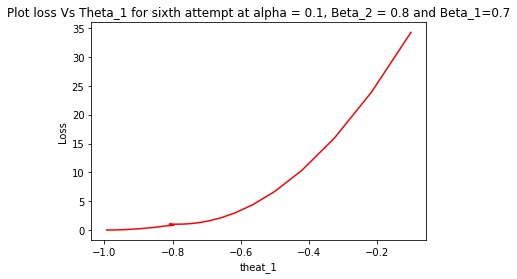

In [53]:
plt.plot(theta1_6, loss_fun_6, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_1 for sixth attempt at alpha = 0.1, Beta_2 = 0.8 and Beta_1=0.7")
plt.show()

## Compare between Three Algorithms

## AT Alpha = 0.1 && Beta_2 = 0.8 && Beta_1 = 0.7

## First Algorithm (Adagrad)

In [54]:
## First Adgrad Algorithm
# 
y_predict_adg , all_y_predict_adg , thetas_adg, theta0_adg, theta1_adg, loss_fun_adg, y_actual = GD_Adagrad(x, y , 1000, 0.1, 1e-8, 0.0001 )
score_adg = r2_score(y_actual, y_predict_adg)
print(f"In Adgrad r2_score = {score_adg} when alpha = 0.1 ")

We Reach 1000 iterations
Norm of Gradient 0.2968736020591688
Error difference0.0002179936750960343
optimal theta_zero = [1.16565087]
optimal theta_one = [-0.93411134]
In Adgrad r2_score = 0.9943524163129175 when alpha = 0.1 


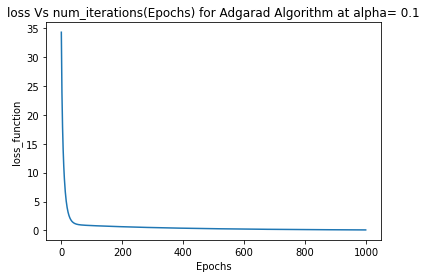

In [55]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_adg)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for Adgarad Algorithm at alpha= 0.1')
plt.show()

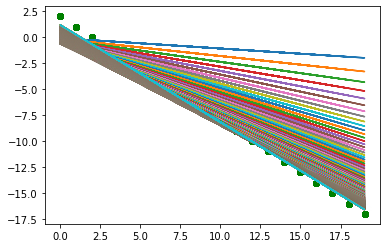

In [56]:
for py in all_y_predict_adg:
    plt.scatter(X,y_actual, color = 'green')
    plt.plot(X, py)
plt.show()

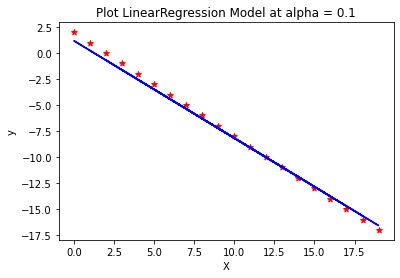

In [57]:
plt.scatter(X,y_actual, marker = '*',color = 'red')
plt.plot(X,y_predict_adg , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model at alpha = 0.1")
plt.show()

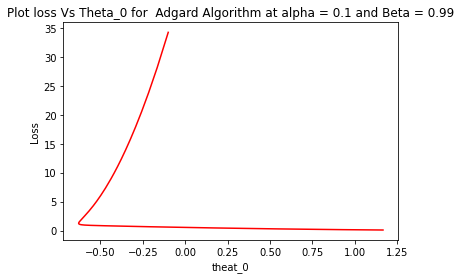

In [58]:
plt.plot(theta0_adg, loss_fun_adg, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0 for  Adgard Algorithm at alpha = 0.1")
plt.show()

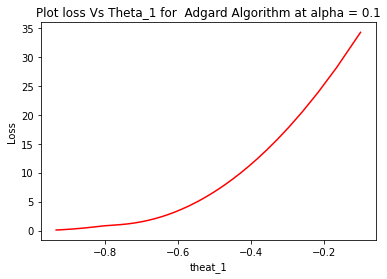

In [60]:
plt.plot(theta1_adg, loss_fun_adg, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_1 for  Adgard Algorithm at alpha = 0.1")
plt.show()

## Second Algorithm (RMSProp)

In [63]:
y_predict_rms , all_y_predict_rms , thetas_rms, theta0_rms, theta1_rms, loss_fun_rms, y_actual = GD_RMSProp(x, y , 1000, 0.1, 0.8,1e-8, 0.0001 )
score_rms = r2_score(y_actual, y_predict_rms)
print(f"In RmsProp Algorithm r2_score = {score_rms} when alpha = 0.1 and Beta = 0.8")

Convergence occure at 92 iterations
stop critical of Error difference occure at 3.364883927930995e-05
Norm of Gradient 6.664072194269355
optimal theta_zero = [1.86765052]
optimal theta_one = [-1.04329256]
In RmsProp Algorithm r2_score = 0.9892375654944893 when alpha = 0.1 and Beta = 0.8


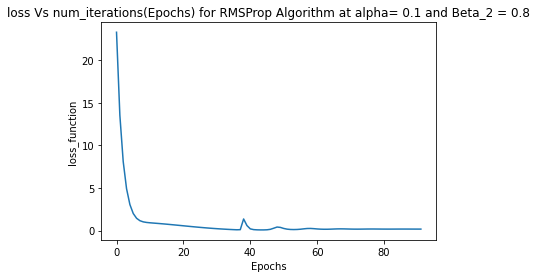

In [64]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_rms)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for RMSProp Algorithm at alpha= 0.1 and Beta_2 = 0.8')
plt.show()

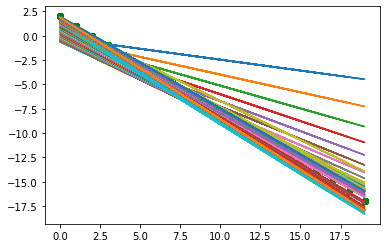

In [65]:
for py in all_y_predict_rms:
    plt.scatter(X,y_actual, color = 'green')
    plt.plot(X, py)
plt.show()

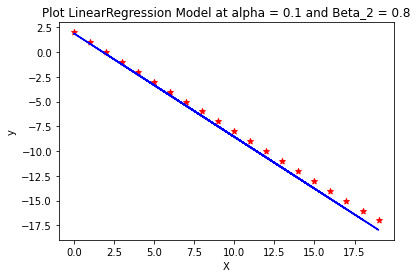

In [66]:
plt.scatter(X,y_actual, marker = '*',color = 'red')
plt.plot(X,y_predict_rms , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model at alpha = 0.1 and Beta_2 = 0.8")
plt.show()

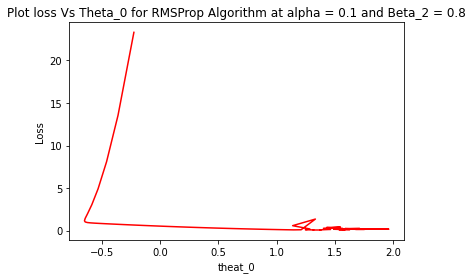

In [67]:
plt.plot(theta0_rms, loss_fun_rms, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0 for RMSProp Algorithm at alpha = 0.1 and Beta_2 = 0.8")
plt.show()

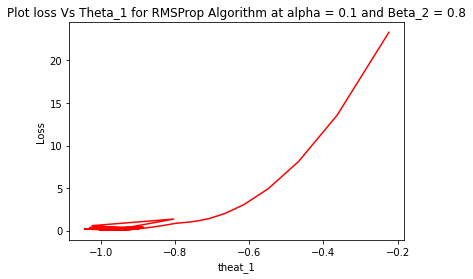

In [68]:
plt.plot(theta1_rms, loss_fun_rms, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_1 for RMSProp Algorithm at alpha = 0.1 and Beta_2 = 0.8")
plt.show()

## Third Algorithm (Adam)

In [70]:
## sixth attempt
y_predict_adm , all_y_predict_adm , thetas_adm, theta0_adm, theta1_adm, loss_fun_adm, y_actual = GD_Adam(x, y , 1000, 0.1, 0.8, 0.7,1e-8, 0.0001 )
score_adm = r2_score(y_actual, y_predict_adm)
print(f"In Adam Algorithm r2_score = {score_adm} when alpha = 0.1 , Beta_2 = 0.8 and Beta_1= 0.7")

Convergence occure at 66 iterations
stop critical of Error difference occure at 6.405733827255511e-05
Norm of Gradient 0.29789771387651726
optimal theta_zero = [1.81426424]
optimal theta_one = [-0.99366204]
In Adam Algorithm r2_score = 0.9994859486486741 when alpha = 0.1 , Beta_2 = 0.8 and Beta_1= 0.7


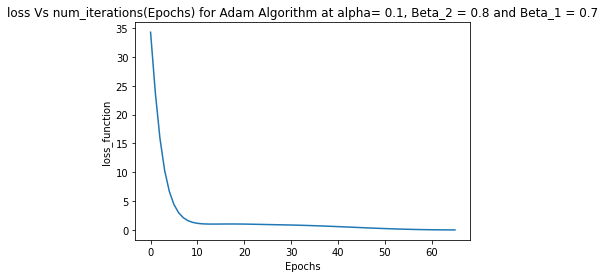

In [71]:
## Plot loss Vs num_iterations(Epochs)
plt.plot(loss_fun_adm)
plt.xlabel('Epochs')
plt.ylabel('loss_function')
plt.title('loss Vs num_iterations(Epochs) for Adam Algorithm at alpha= 0.1, Beta_2 = 0.8 and Beta_1 = 0.7')
plt.show()

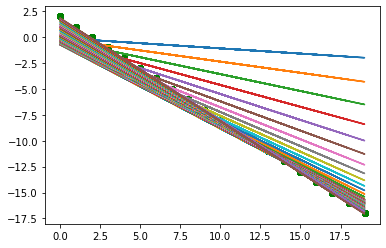

In [72]:
for py in all_y_predict_adm:
    plt.scatter(X,y_actual, color = 'green')
    plt.plot(X, py)
plt.show()

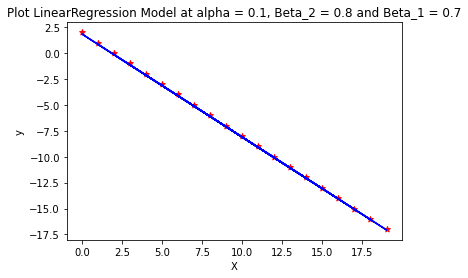

In [73]:
plt.scatter(X,y_actual, marker = '*',color = 'red')
plt.plot(X,y_predict_adm , color = 'blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression Model at alpha = 0.1, Beta_2 = 0.8 and Beta_1 = 0.7")
plt.show()

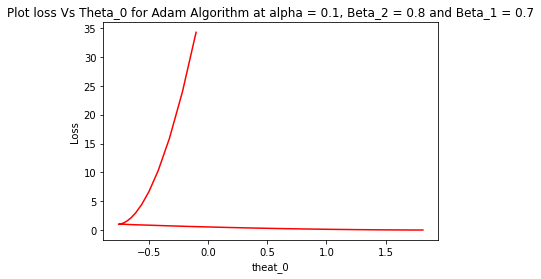

In [74]:
plt.plot(theta0_adm, loss_fun_adm, c = "red")
plt.xlabel("theat_0")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_0 for Adam Algorithm at alpha = 0.1, Beta_2 = 0.8 and Beta_1 = 0.7")
plt.show()

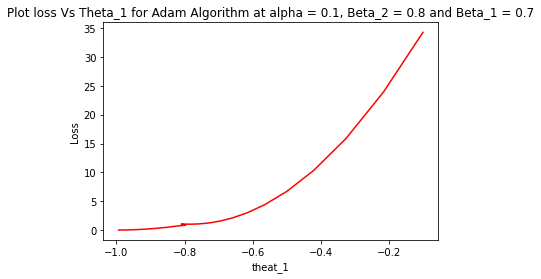

In [75]:
plt.plot(theta1_adm, loss_fun_adm, c = "red")
plt.xlabel("theat_1")
plt.ylabel("Loss")
plt.title("Plot loss Vs Theta_1 for Adam Algorithm at alpha = 0.1, Beta_2 = 0.8 and Beta_1 = 0.7")
plt.show()